In [50]:
import pandas as pd
from pandas_profiling import ProfileReport
import os
import plotly.express as px

In [2]:
df = pd.read_csv('../data/merged.csv', sep = ';')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92787 entries, 1 to 92787
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   zipcode                   92787 non-null  int64  
 1   territory                 92787 non-null  int64  
 2   cgr                       92787 non-null  object 
 3   gender                    92787 non-null  object 
 4   birthdate                 92787 non-null  object 
 5   ypc                       92787 non-null  int64  
 6   current_premium           92787 non-null  float64
 7   indicated_premium         92787 non-null  float64
 8   selected_premium          92787 non-null  float64
 9   underlying_premium        92787 non-null  float64
 10  fixed_expenses            92787 non-null  float64
 11  underlying_total_premium  92787 non-null  float64
 12  cgr_factor                92787 non-null  float64
 13  county                    92787 non-null  object 
 14  county

/Users/jdavidmartinezg/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['birthdate'] = pd.to_datetime(df['birthdate'])
df['zipcode'] = df['zipcode'].astype('category')
df['territory'] = df['territory'].astype('category')
df['cgr'] = df['cgr'].astype('category')
df['gender'] = df['gender'].astype('category')
df['county'] = df['county'].astype('category')
df['county_code'] = df['county_code'].astype('category')
df['town'] = df['town'].astype('category')
df['majority_minority'] = df['majority_minority'].astype('bool')
df['age_bucket'] = df['age_bucket'].astype('category')
df['shift_category'] = df['shift_category'].astype('category')
df['IncCat'] = df['IncCat'].astype('category')
df['PNW_bucket4'] = df['PNW_bucket4'].astype('category')

In [14]:
df

zipcode territory  cgr gender  birthdate  ypc  current_premium  \
1       20601       601  5JO      M 1967-08-02    5          2277.18   
2       20601       601  096      M 1966-11-12    4           665.69   
3       20601       601  D7G      F 1961-10-16    5           499.22   
4       20601       601  I85      M 1984-10-03    0          2105.59   
5       20601       601  MPY      F 1977-10-04    5          1236.84   
...       ...       ...  ...    ...        ...  ...              ...   
92783   21921      1921  W5X      F 1977-03-27    5           813.95   
92784   21921      1921  AOU      M 1967-12-10    5          1397.65   
92785   21921      1921  Q8Z      F 1961-10-20    5           609.90   
92786   21921      1921  4ZR      M 1986-10-30    5           718.72   
92787   21921      1921  TP5      F 1931-08-06    5           542.61   

       indicated_premium  selected_premium  underlying_premium  ...  \
1                2978.78           2720.61             2135.64  ...   
2                 799.66            698.74              448.46  ...   
3                 437.36            497.86              386.93  ...   
4                2408.19           2208.83             1897.61  ...   
5                1596.46           1298.36             1167.95  ...   
...                  ...               ...                 ...  ...   
92783             768.40            811.46              641.47  ...   
92784            1069.58           1394.47              986.88  ...   
92785             741.74            637.79              447.19  ...   
92786             929.01            753.42              540.55  ...   
92787             542.67            544.42              316.47  ...   

       is_above_current  is_above_difference  is_both IndMinCur SelMinCur  \
1                  True                 True     True    701.60    443.43   
2                 False                False    False    133.97     33.05   
3                 False                False    False    -61.86     -1.36   
4                  True                False    False    302.60    103.24   
5                 False                False    False    359.62     61.52   
...                 ...                  ...      ...       ...       ...   
92783             False                False    False    -45.55     -2.49   
92784             False                False    False   -328.07     -3.18   
92785             False                False    False    131.84     27.89   
92786             False                False    False    210.29     34.70   
92787             False                False    False      0.06      1.81   

      SelDivCur  IncDivCur  SelDivInd                  IncCat  PNW_bucket4  
1      1.194728   1.308100   0.913330          Large Increase    >0.5-0.75  
2      1.049648   1.201250   0.873796          Small Increase    >0.5-0.75  
3      0.997276   0.876087   1.138330  Decreased or No Change    >0.5-0.75  
4      1.049031   1.143713   0.917216          Small Increase    >0.5-0.75  
5      1.049740   1.290757   0.813274          Small Increase    >0.5-0.75  
...         ...        ...        ...                     ...          ...  
92783  0.996941   0.944038   1.056039  Decreased or No Change       0-0.25  
92784  0.997725   0.765270   1.303755  Decreased or No Change       0-0.25  
92785  1.045729   1.216167   0.859857          Small Increase       0-0.25  
92786  1.048280   1.292590   0.810992          Small Increase       0-0.25  
92787  1.003336   1.000111   1.003225          Small Increase       0-0.25  

[92787 rows x 39 columns]

In [16]:
df.IncCat.value_counts()

Decreased or No Change    48736
Small Increase            42218
Large Increase             1833
Name: IncCat, dtype: int64

In [22]:
df['large_increase'] = (df['IncCat'] == 'Large Increase')

In [23]:
df.large_increase.value_counts()

False    90954
True      1833
Name: large_increase, dtype: int64

In [52]:
from fairml import audit_model
from fairml import plot_dependencies
from pycaret.classification import * 


In [131]:
df_trimmed = df[['gender', # 'ypc',
                 'current_premium','indicated_premium',
                 'fixed_expenses',
                 'percentage_nonwhite',
                 'majority_minority',
                 'median_income',
                 'age',
                 'large_increase']]

df_trimmed.gender = df_trimmed.gender == 'F'

In [132]:
model = setup(df_trimmed, 
              target = 'large_increase',
             normalize = True,
             fix_imbalance = True)

Setup Succesfully Completed!


In [31]:
best = compare_models(blacklist = ['lightgbm'])

IntProgress(value=0, description='Processing: ', max=176)

Initiated  . . . . . . . . . . . . . . . . . .          09:24:20
Status     . . . . . . . . . . . . . . . . . .  Finalizing Model
ETC        . . . . . . . . . . . . . . . . . .   Almost Finished

Model  Accuracy     AUC  Recall   Prec.      F1  \
0         Extreme Gradient Boosting    0.9984  0.9998  0.9914  0.9315  0.9603   
1          Decision Tree Classifier    0.9979  0.9840  0.9696  0.9294  0.9490   
2      Gradient Boosting Classifier    0.9952  0.9998  0.9945  0.8063  0.8905   
3          Random Forest Classifier    0.9942  0.9978  0.9548  0.7955  0.8675   
4            Extra Trees Classifier    0.9930  0.9983  0.9127  0.7737  0.8369   
5              Ada Boost Classifier    0.9891  0.9993  0.9953  0.6453  0.7828   
6            K Neighbors Classifier    0.9837  0.9850  0.9485  0.5525  0.6977   
7               Logistic Regression    0.9701  0.9941  0.9930  0.3983  0.5683   
8               SVM - Linear Kernel    0.9681  0.0000  0.9953  0.3837  0.5535   
9                  Ridge Classifier    0.9570  0.0000  0.9992  0.3156  0.4794   
10     Linear Discriminant Analysis    0.9570  0.9901  0.9992  0.3156  0.4794   
11                      Naive Bayes    0.9327  0.9885  0.9984  0.2274  0.3703   
12  Quadratic Discriminant Analysis    0.4814  0.6057  0.7340  0.0297  0.0555   

     Kappa     MCC  TT (Sec)  
0   0.9594  0.9601    9.8425  
1   0.9480  0.9482    0.5272  
2   0.8881  0.8932   15.4201  
3   0.8646  0.8685    0.2919  
4   0.8334  0.8366    0.8335  
5   0.7774  0.7968    5.5169  
6   0.6900  0.7170    0.1902  
7   0.5558  0.6190    0.3806  
8   0.5403  0.6075    0.1709  
9   0.4633  0.5489    0.0892  
10  0.4633  0.5489    0.1988  
11  0.3493  0.4597    0.0920  
12  0.0205  0.0646    0.0967

LightGBMError: Wrong size of feature_names

In [152]:
# the best model appears to be Decision trees & Ridge Classifier

lr = create_model('dt')

In [153]:
lr_tunned = tune_model(lr)

In [154]:
lr_tunned

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8069, splitter='best')

In [155]:
df_trimmed.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92722 entries, 1 to 92787
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               92722 non-null  bool   
 1   current_premium      92722 non-null  float64
 2   indicated_premium    92722 non-null  float64
 3   fixed_expenses       92722 non-null  float64
 4   percentage_nonwhite  92722 non-null  float64
 5   majority_minority    92722 non-null  bool   
 6   median_income        92722 non-null  float64
 7   age                  92722 non-null  int64  
 8   large_increase       92722 non-null  bool   
dtypes: bool(3), float64(5), int64(1)
memory usage: 5.2 MB


In [156]:
from pycaret.utils import enable_colab
enable_colab()
%matplotlib inline

evaluate_model(lr_tunned)

Colab mode activated.


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

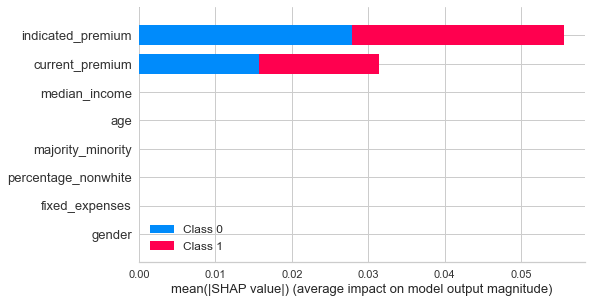

In [159]:
interpret_model(lr_tunned)

## FairML

In [150]:
testdf = df_trimmed.drop(columns = ['large_increase']).dropna()

In [151]:
total, _ = audit_model(lr_tunned.predict, testdf)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [35]:
# print feature importance
print(total)

# generate feature dependence plot
fig = plot_dependencies(
    total.get_compress_dictionary_into_key_median(),
    reverse_values=False,
    title="FairML feature dependence"
)
plt.savefig("fairml_ldp.eps", transparent=False, bbox_inches='tight')

Unexpected error:  <class 'ValueError'>
Input data contains some null values. Please check and handleappropriately.


RuntimeError: No active exception to reraise

## FairLearn

In [111]:
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.reductions import GridSearch, EqualizedOdds
from fairlearn.widget import FairlearnDashboard

# Metrics
from fairlearn.metrics import (
    selection_rate, demographic_parity_difference, demographic_parity_ratio,
    balanced_accuracy_score_group_summary, roc_auc_score_group_summary,
    equalized_odds_difference, difference_from_summary)
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

In [112]:
# Helper functions
def get_metrics_df(models_dict, y_true, group):
    metrics_dict = {
        "Overall selection rate": (
            lambda x: selection_rate(y_true, x), True),
        "Demographic parity difference": (
            lambda x: demographic_parity_difference(y_true, x, sensitive_features=group), True),
        "Demographic parity ratio": (
            lambda x: demographic_parity_ratio(y_true, x, sensitive_features=group), True),
        "-----": (lambda x: "", True),
        "Overall balanced error rate": (
            lambda x: 1-balanced_accuracy_score(y_true, x), True),
        "Balanced error rate difference": (
            lambda x: difference_from_summary(
                balanced_accuracy_score_group_summary(y_true, x, sensitive_features=group)), True),
        "Equalized odds difference": (
            lambda x: equalized_odds_difference(y_true, x, sensitive_features=group), True),
        "------": (lambda x: "", True),
        "Overall AUC": (
            lambda x: roc_auc_score(y_true, x), False),
        "AUC difference": (
            lambda x: difference_from_summary(
                roc_auc_score_group_summary(y_true, x, sensitive_features=group)), False),
    }
    df_dict = {}
    for metric_name, (metric_func, use_preds) in metrics_dict.items():
        df_dict[metric_name] = [metric_func(preds) if use_preds else metric_func(scores) 
                                for model_name, (preds, scores) in models_dict.items()]
    return pd.DataFrame.from_dict(df_dict, orient="index", columns=models_dict.keys())

In [125]:
dt_params = dict(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8040, splitter='best')

In [126]:
from sklearn.model_selection import train_test_split

df_trimmed = df_trimmed.dropna()

X_train, X_test, y_train, y_test = train_test_split(df_trimmed[['gender','ypc',
                 'current_premium','indicated_premium',
                 'fixed_expenses',
                 'percentage_nonwhite',
                 'majority_minority',
                 'median_income',
                 'age']], df_trimmed['large_increase'], random_state=1)

In [127]:
from sklearn import tree

model = tree.DecisionTreeClassifier(**dt_params)

In [128]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=8040, splitter='best')

In [129]:
test_scores = model.predict_proba(X_test)[:, 1]
test_preds = (test_scores >= np.mean(y_train)) * 1

In [130]:
# Metrics
models_dict = {"Unmitigated": (test_preds, test_scores)}
get_metrics_df(models_dict, y_test, A_str_test)

NameError: name 'A_str_test' is not defined